In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import FastICA, PCA
from scipy import signal

In [6]:
np.random.seed(123)
n_samples = 3000                  ## for x axis 
time = np.linspace(0,8,n_samples)  ## for y axis

In [10]:
## Generating Different Types of Signals 


s1 = np.sin(2*time)                                 ## Sinusoidal Wave 
s2 = np.sign(np.sin(3*time))                        ## Square Wave
s3 = signal.sawtooth(2 * np.pi * time)              ## Sawtooth Wave

In [11]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)   # Adding Noise to the Signal

In [12]:
## Standardize the data 
S /= S.std(axis=0)

In [13]:
## Mixing the Data 

A = np.array([[1,1,1],[0.5,2,1.0],[1.5,1.0,2.0]])   ## Mixing Matrix for the 3 Signals 

# Create the Data for ICA 

X = np.dot(S,A.T)

In [14]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)   ## Get Estimated Signals

A_ = ica.mixing_

In [16]:
## Assertion for Proving that ICA Signals unmixing and Reverting

assert np.allclose(X, np.dot(S_,A_.T)+ica.mean_)

In [17]:
## Computing PCA for Comparison
pca = PCA(n_components=3)
H = pca.fit_transform(X)

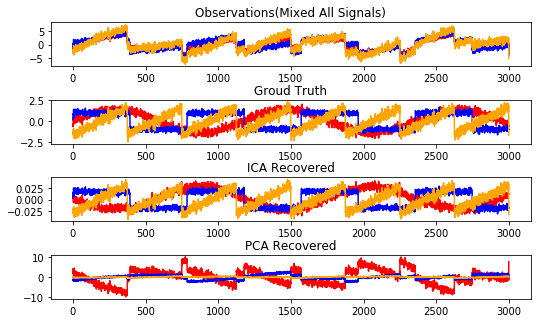

In [23]:
## Plotting the results 

plt.figure()
models = [X, S,S_,H]

names= ['Observations(Mixed All Signals)', 'Groud Truth', 'ICA Recovered', 'PCA Recovered']
colors = ['red', 'blue', 'orange']
for i, (model,name) in enumerate(zip(models,names), 1):
    plt.subplot(4,1,i)
    plt.title(name)
    for sig ,color in zip(model.T,colors):
        plt.plot(sig,color=color)

plt.subplots_adjust(0.39,0.54,1.5,1.5,1,0.76)
plt.show()